In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets            # 取得圖片資料集
import torchvision.transforms as transforms # 圖片 transform
from models.Unet.unet import UNet
from utils.draw import showImg

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 取得資料
temp_data = datasets.MNIST( './dataset', train=True, download=True, transform=transforms.ToTensor() )
temp_dataloader = DataLoader( temp_data, batch_size=10, shuffle=False)

In [15]:
# 訓練資訊 & 超參數
epochs = 20
batch_size = 64
lr = 0.001
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )

train_data = datasets.MNIST( './dataset', train=True, download=True, transform=transforms.ToTensor() )
train_dataloader = DataLoader( train_data, batch_size=batch_size, shuffle=True)


model = UNet(in_channels=1, out_channels=1).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam( model.parameters(), lr=lr )

In [16]:
# Train
losses = []
for epoch in range(epochs):
    total_loss = 0
    for true_img, num_label in train_dataloader:      
        true_img = true_img.to(device)

        gen_img = model( true_img )
        loss = loss_fn( gen_img, true_img )             #
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        losses.append( loss.item() )
        
    total_loss /= len(train_dataloader.dataset) # batch 平均 loss
    
    if(epoch % 2 == 0 ):
        print( f"Epoch: {epoch} / {epochs} \t Loss: {total_loss}")

Epoch: 0 / 20 	 Loss: 4.2337453147532266e-05
Epoch: 2 / 20 	 Loss: 2.184652526860494e-06
Epoch: 4 / 20 	 Loss: 1.8585121848142687e-06
Epoch: 6 / 20 	 Loss: 1.4006919707602113e-06
Epoch: 8 / 20 	 Loss: 8.601201186138496e-07
Epoch: 10 / 20 	 Loss: 5.112296110837633e-07
Epoch: 12 / 20 	 Loss: 6.726038233182408e-07
Epoch: 14 / 20 	 Loss: 4.1054793527261306e-07
Epoch: 16 / 20 	 Loss: 3.0814394186033195e-07
Epoch: 18 / 20 	 Loss: 2.683628379145375e-07


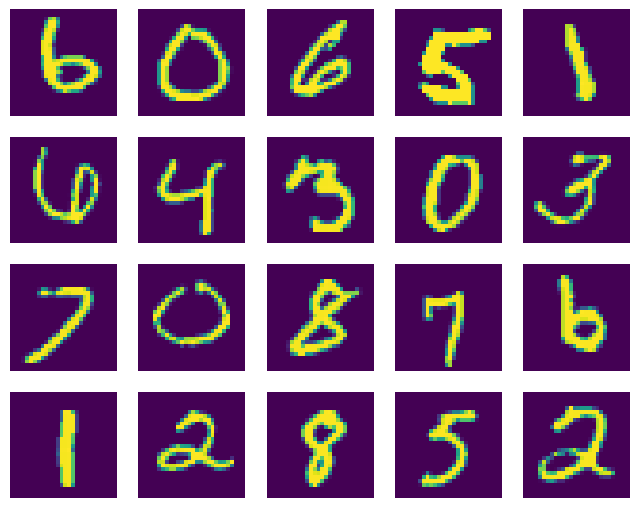

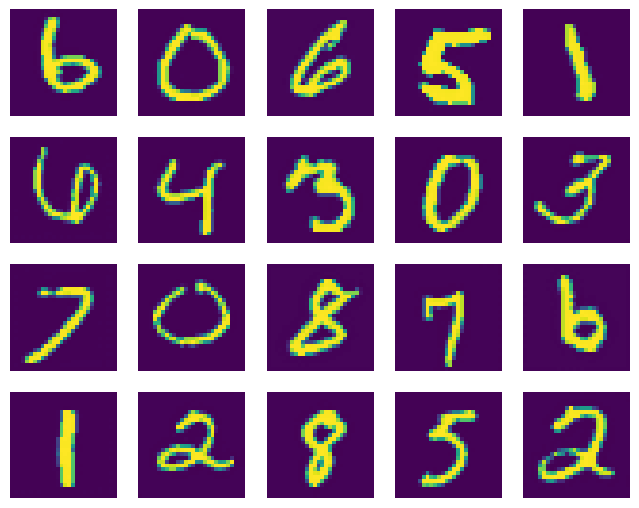

In [19]:
# 進行測試生成
test_data = datasets.MNIST( './dataset', train=False, download=True, transform=transforms.ToTensor() )
test_dataloader = DataLoader( test_data, batch_size=20, shuffle=True)

with torch.no_grad():
    for idx, ( true_img, num_label ) in enumerate( test_dataloader ):
        
        # Unet 生成
        gen_img = model(true_img.to(device))
        
        # 印出圖片
        if( idx == 1 ):
            # 印出原圖片
            showImg( true_img )
            # 印出生成圖片
            showImg( gen_img.cpu() )
            plt.show()